Fraud Detection Project

# Problem Description for Fraud Detection

explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions.



## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
  
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# notes

- Decision trees are a good choice for fraud detection due to their interpretability.
- For a POC, The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.


--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

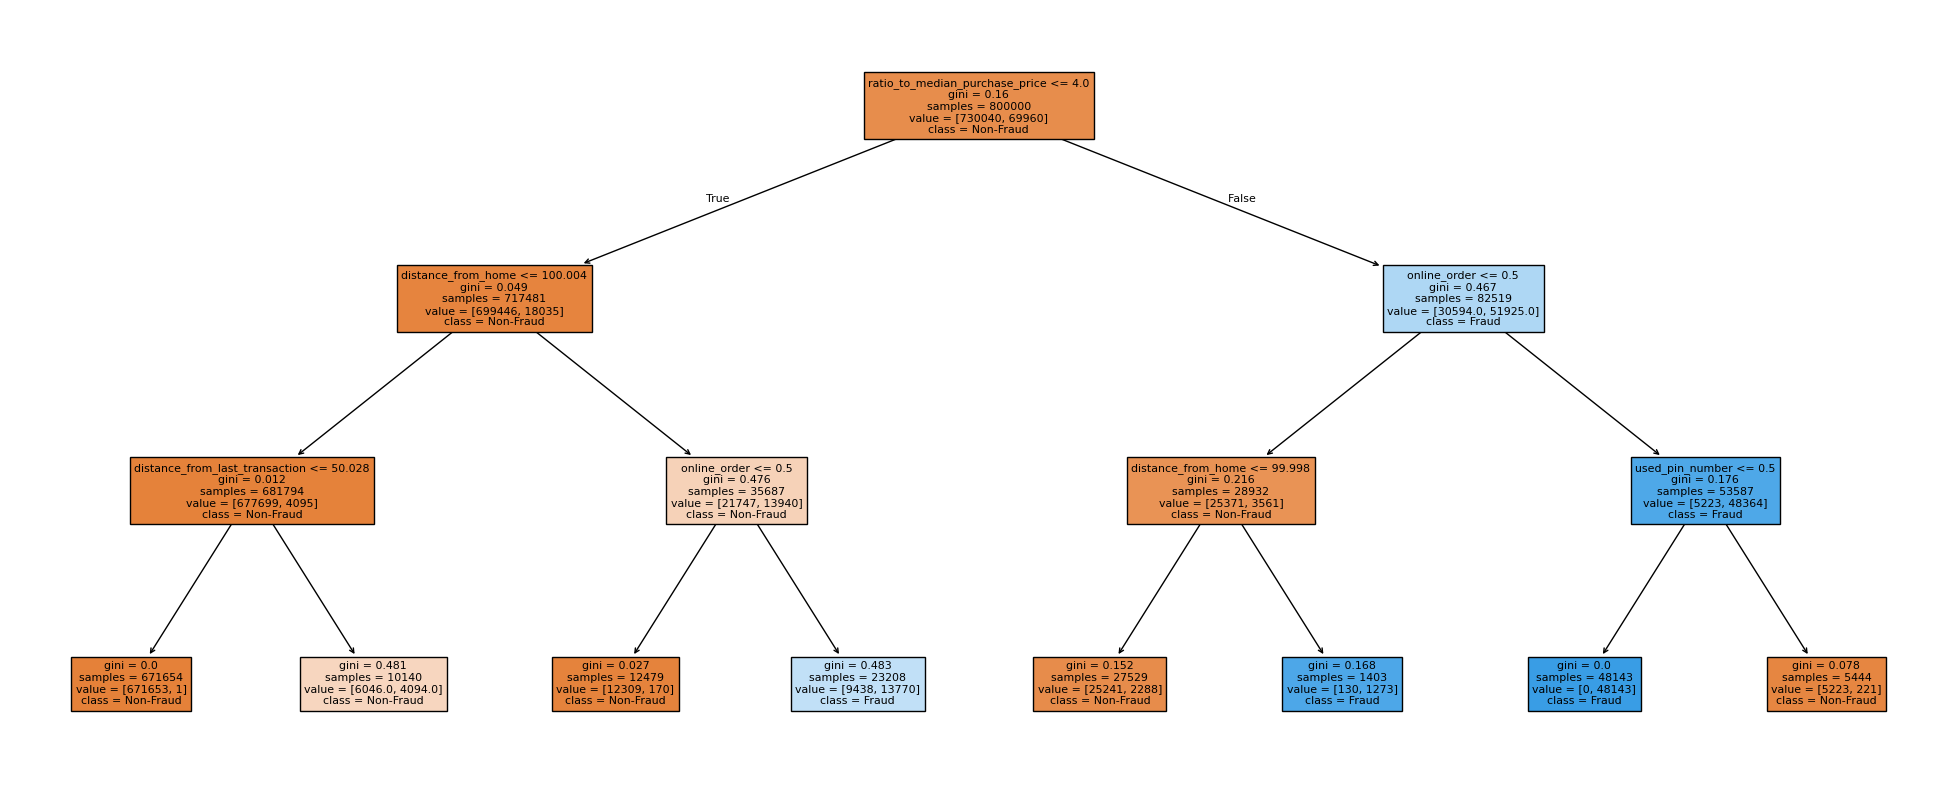

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
#print("\n--- Event Rate ---")
#event_rate = data['fraud'].mean() * 100
#print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model,
          filled=True,
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

Decision Tree Confusion Matrix:
[[180076   2481]
 [  1646  15797]]

Random Forest Confusion Matrix:
[[182557      0]
 [     2  17441]]


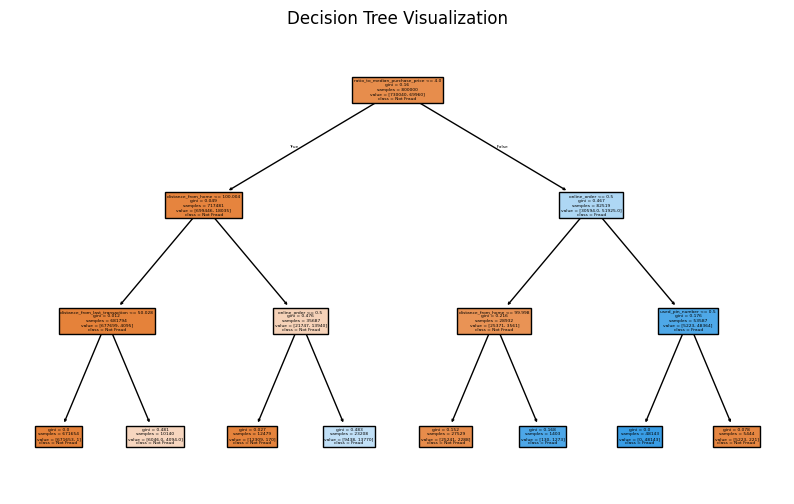


Random Forest Feature Importances:
ratio_to_median_purchase_price    0.527173
online_order                      0.169382
distance_from_home                0.134905
used_pin_number                   0.063926
used_chip                         0.052102
distance_from_last_transaction    0.045709
repeat_retailer                   0.006803
dtype: float64

Model Comparison Table:
Model            Precision    Recall    F1-Score       AUC
-------------  -----------  --------  ----------  --------
Decision Tree     0.864263  0.905635    0.884466  0.946023
Random Forest     1         0.999885    0.999943  0.999943


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Define the attributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Initialize and train a random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate the models
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1_score = 2 * (dt_precision * dt_recall) / (dt_precision + dt_recall)
dt_auc = roc_auc_score(y_test, dt_pred)
dt_confusion = confusion_matrix(y_test, dt_pred)

rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1_score = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)
rf_auc = roc_auc_score(y_test, rf_pred)
rf_confusion = confusion_matrix(y_test, rf_pred)

# Print Confusion Matrices
print("Decision Tree Confusion Matrix:")
print(dt_confusion)
print("\nRandom Forest Confusion Matrix:")
print(rf_confusion)

# Plot Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'])
plt.title("Decision Tree Visualization")
plt.show()

# Get Random Forest Feature Importances
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print Random Forest Feature Importances
print("\nRandom Forest Feature Importances:")
print(rf_feature_importances)

# Prepare data for table comparison
metrics = ['Precision', 'Recall', 'F1-Score', 'AUC']
dt_scores = [dt_precision, dt_recall, dt_f1_score, dt_auc]
rf_scores = [rf_precision, rf_recall, rf_f1_score, rf_auc]

comparison_data = [
    ["Decision Tree"] + dt_scores,
    ["Random Forest"] + rf_scores
]

# Print the table
print("\nModel Comparison Table:")
print(tabulate(comparison_data, headers=["Model", "Precision", "Recall", "F1-Score", "AUC"]))
